In [78]:
# File: linear_regression_one_varialbe
# Name:
# ----------------------------
# This file shows the fundamental concepts of
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [79]:
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# This function computes the L2 loss which is
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
  return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b -y[i])**2 for i in range(len(x)))/(2*len(x))



In [81]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [82]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
  return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b -y[i])*x[i]**3 for i in range(len(x)))/len(x)

In [83]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [84]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
  return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b -y[i])*x[i]**2 for i in range(len(x)))/len(x)

In [85]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [86]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
  return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b -y[i])*x[i] for i in range(len(x)))/len(x)

In [87]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [88]:
def dJ_db(theta1, theta2, theta3, b, x, y):
  return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b -y[i]) for i in range(len(x)))/len(x)

In [89]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [90]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [120]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [121]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [122]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

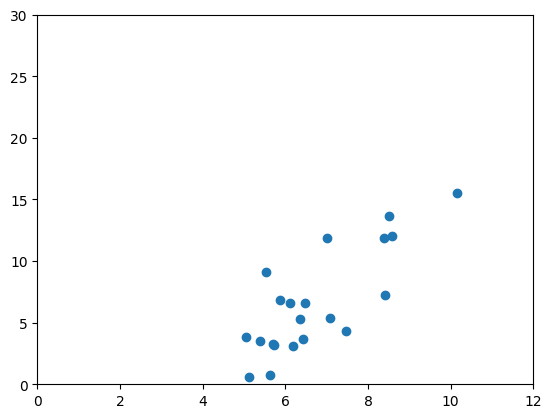

In [123]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [124]:
# Please perform feature scaling (normalization) by:
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list((x[i]-min(x)) / (max(x)-min(x)) for i in range (len(x)))
y = list((y[i]-min(y)) / (max(y)-min(y)) for i in range (len(y)))

In [125]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

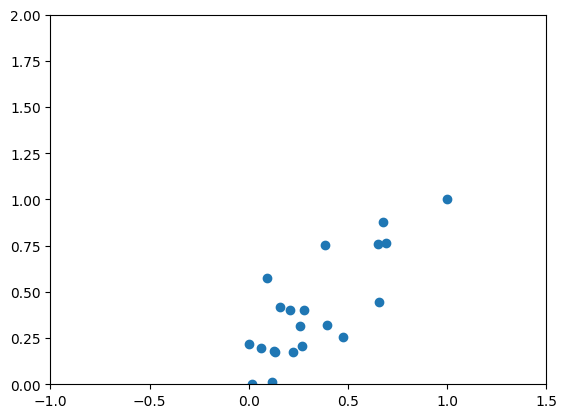

In [126]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [127]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [128]:
theta1 = 1
theta2 = -1
theta3 = 1
b = 3


In [129]:
# ---------- Initialize your alpha ---------- #

In [130]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [131]:
alpha = 0.1

In [132]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- #

In [133]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)
    #G.D.
    theta1 = theta1 - alpha * dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 = theta2 - alpha * dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 = theta3 - alpha * dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b = b - alpha * dJ_db(theta1, theta2, theta3, b, x, y)

In [134]:
# ---------- Cost changes during training process ---------- #

In [135]:
# Pay attention to the trend of cost.
# Is is rising? If it is, why?

print(cost_history)

[4.124567341922083, 3.243927403566749, 2.5550159055066395, 2.01601403432866, 1.5942246153284791, 1.2640827177700065, 1.0056000996524677, 0.8031488873504985, 0.6445105146212023, 0.5201320763821903, 0.4225448661890055, 0.34590972944365805, 0.2856615767777857, 0.23823143273387146, 0.2008291105196509, 0.17127329097874286, 0.1478586672246035, 0.1292520709540414, 0.11441125938912998, 0.10252142029642511, 0.0929455304279513, 0.0851855455686335, 0.07885205941569381, 0.0736405838364546, 0.06931300599190884, 0.06568309288043765, 0.06260516021153287, 0.05996521514719159, 0.05767403306527396, 0.05566174626613894, 0.05387361462507621, 0.052266720190047196, 0.050807384017119823, 0.04946914754965517, 0.0482311952598196, 0.04707712217638142, 0.045993970958374215, 0.04497147962034881, 0.04400149387267027, 0.043077508092386196, 0.04219430679863384, 0.041347684649910815, 0.040534227782978625, 0.03975114306725991, 0.03899612478307066, 0.03826725052574868, 0.03756289993052972, 0.03688169121421224, 0.036222

In [136]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: 1, theta2: -1, theta3: 1, b: 3


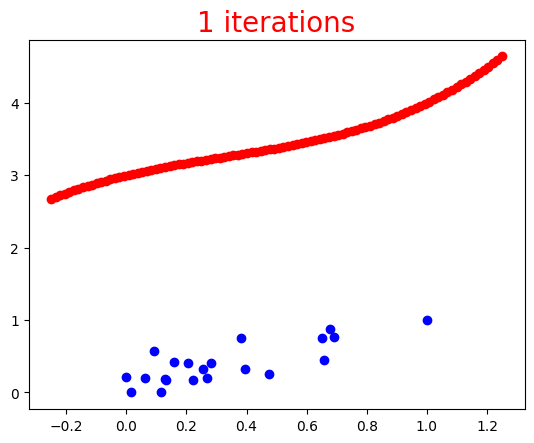

In [137]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.8217409706269917, theta2: -1.2682431541319767, theta3: 0.48662741986021624, b: 1.3491997950710053


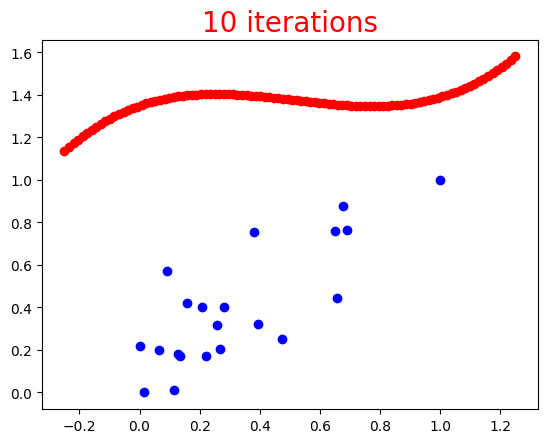

In [138]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.8019145775891817, theta2: -1.3142345753573386, theta3: 0.3544753070769127, b: 0.7386890932031228


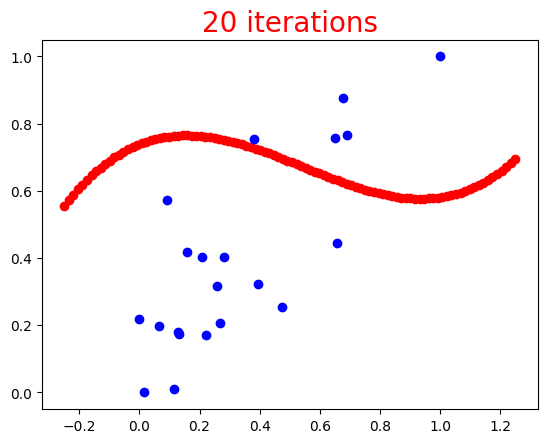

In [139]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [140]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.8336394262840535, theta2: -1.285214198925415, theta3: 0.35819583866176, b: 0.5302974609853929


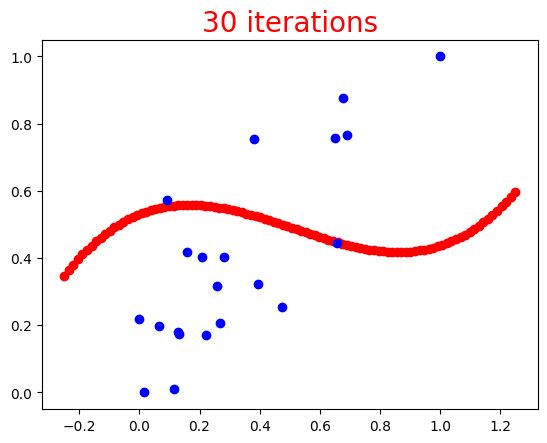

In [141]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.874856362162566, theta2: -1.2402952313425533, theta3: 0.39595043539782476, b: 0.44363288550435537


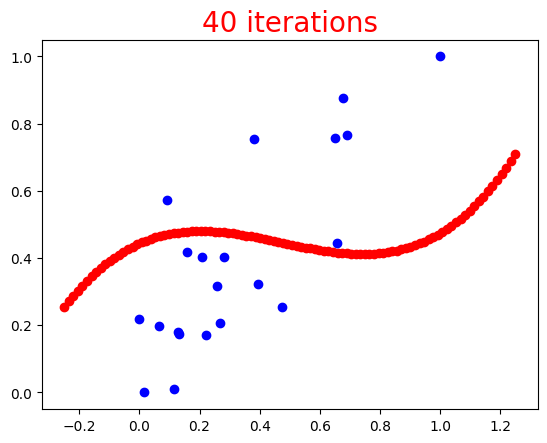

In [142]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

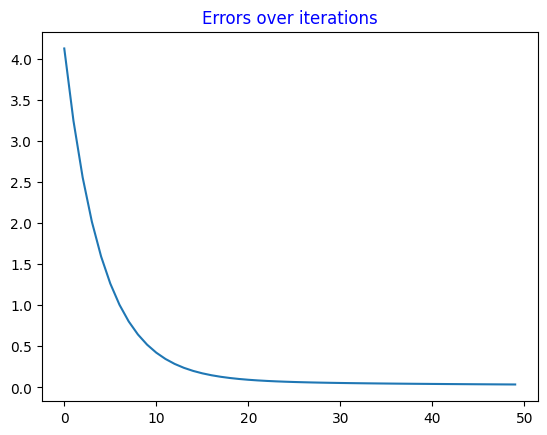

In [143]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')